In [1]:
# Import libraries:
import pandas as pd
import importlib
import dt_ids7_export_module as bh_utils
import mapping_module as bh_map
import plot_module as bh_plot
import reporting_module as bh_report
import mapping_dict_PCI as rad_pci_dict

# Make sure personal libraries are reloaded incase of adjustments:
importlib.reload(bh_utils)
importlib.reload(bh_map)
importlib.reload(bh_plot)
importlib.reload(bh_report)
importlib.reload(rad_pci_dict)

# Get the name of the computer:
import socket
hostname = socket.gethostname()
if hostname == 'BHs-Desktop':
    path = 'E:\\'
elif hostname == 'BH-XPS':
    path = 'G:\\'
else:
    path = 'D:\\'

# Import the data:
df_ids7 = pd.read_excel(path + 'PCI\IDS7\KUL_KRH_PCI.xlsx')
df_dt = pd.read_excel(path + 'PCI\DoseTrack\DoseTrack KRH_XA.xlsx')
del path, hostname

# Convert all variants of the ['Rom/modalitet (RIS)'] to the standard lab name:
# Convert values of 'KRH_XA3_Coroventis' to 'KRH_XA3':
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA3_Coroventis', 'KRH_XA3')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA3_IVUS', 'KRH_XA3')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA3_OCT', 'KRH_XA3')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA7_Intrasight', 'KRH_XA7')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA7_Coroventis', 'KRH_XA7')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA7_IVUS', 'KRH_XA7')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA7_OCT', 'KRH_XA7')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA8_Coroventis', 'KRH_XA8')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA8_IVUS', 'KRH_XA8')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KRH_XA8_OCT', 'KRH_XA8')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA1_Coroventis', 'KUL_XA1')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA1_IVUS', 'KUL_XA1')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA1_OCT', 'KUL_XA1')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA1_MacLab', 'KUL_XA1')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA2_IVUS', 'KUL_XA2')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA2_OCT', 'KUL_XA2')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA2_MacLab', 'KUL_XA2')

df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA4_IVUS', 'KUL_XA4')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA4_OCT', 'KUL_XA4')
df_ids7['Rom/modalitet (RIS)'] = df_ids7['Rom/modalitet (RIS)'].replace('KUL_XA4_MacLab', 'KUL_XA4')

# Run all cleanups, filters and checks:
df_ids7 = bh_utils.run_all_cleanup_filters_and_checks(df_ids7, df_dt, True)
# Merge the dataframes:
data = bh_utils.merge_ids7_dt(df_ids7, df_dt, True)
# Get the mapping dictionary:
mapping_dict = rad_pci_dict.get_PCI_mapping_dict()
# First we perform mapping on selected procedures:
data = bh_map.map_procedures(data, mapping_dict, True)

del df_dt, df_ids7, mapping_dict

Dropping unnecessary column: Status
Number of rows with NaT in the column "Bestilt dato og tidspunkt": 1
Number of cancelled procedures: 418
Number of non-human subjects: 3
Number of rows with invalid accession number: 1
8029    NNUL000009420412
Name: Henvisnings-ID, dtype: object
Number of accession numbers in IDS7: 9558
Number of accession numbers in IDS7 not in DoseTrack: 241


c:\Users\bjorn\BH_Kode\XA_DoseAnalysis\Code\dt_ids7_export_module.py:551: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  acc_nr_in_dt[acc] = df_ids7[(df_ids7['Pasient'] == patient) & (df_ids7['Bestilt dato og tidspunkt'] == time) & \


Inserted accession number: NKRH000008109028 for patient: PAS5739, time: 2023-03-07 13:46:00, accession numbers: ['NKRH000008109013' 'NKRH000008109028']
The accession numbers have been changed. Running check_accession_ids7_vs_dt
Number of accession numbers in IDS7: 9557
Number of accession numbers in IDS7 not in DoseTrack: 240
Number of accession numbers in DoseTrack: 9523
Number of accession numbers in DoseTrack not in IDS7: 206
The IDS7 and DoseTrack has merged data of length: 9317
Mapping procedures...

RGV Cor Mitraclip (int.) -> Mitraclip
RGA Cor TAVI (int.) -> TAVI
RGA Cor Koronarangiografi (int.) & ~RGA Cor PCI & ~RGA Cor PTSMA & ~RGA Cor ECMO & ~RGV Cor PFO & ~RGA Cor TAVI -> Koronarangiografi
RGA Cor PCI & ~RGA Cor ECMO & ~RGA Cor TAVI -> PCI
RGA Cor PTSMA (int.) & ~RGA Cor PCI -> PTSMA
RGV Cor PFO (int.) -> PFO


In [ ]:
# mapping_dict = rad_xa_dict.get_rad_xa_mapping_dict()
# First we perform mapping on selected procedures:
# data = bh_map.map_procedures(data, mapping_dict, True)


Reporting doses for PCI:


Alle: n = 3113, DAP: Median - 30.2, IQR [17.4 - 50.8] (Gy*cm2), Range (0.0 - 489.7).


KRH_XA3: n =  304, DAP: Median - 45.07, IQR [26.9 - 76.29] (Gy*cm2), Range (4.58 - 332.48).
KRH_XA6: n =  232, DAP: Median - 31.52, IQR [19.61 - 52.18] (Gy*cm2), Range (3.81 - 201.76).
KRH_XA7: n =  815, DAP: Median - 36.47, IQR [20.9 - 59.7] (Gy*cm2), Range (1.85 - 489.67).
KRH_XA8: n =  167, DAP: Median - 33.62, IQR [20.69 - 57.86] (Gy*cm2), Range (0.03 - 250.01).
KUL_XA1: n =  582, DAP: Median - 21.5, IQR [13.54 - 37.32] (Gy*cm2), Range (3.09 - 247.83).
KUL_XA2: n =  655, DAP: Median - 26.13, IQR [15.27 - 43.85] (Gy*cm2), Range (3.36 - 230.69).
KUL_XA4: n =  358, DAP: Median - 27.52, IQR [18.86 - 44.44] (Gy*cm2), Range (1.98 - 286.33).
--------------------------------------------------




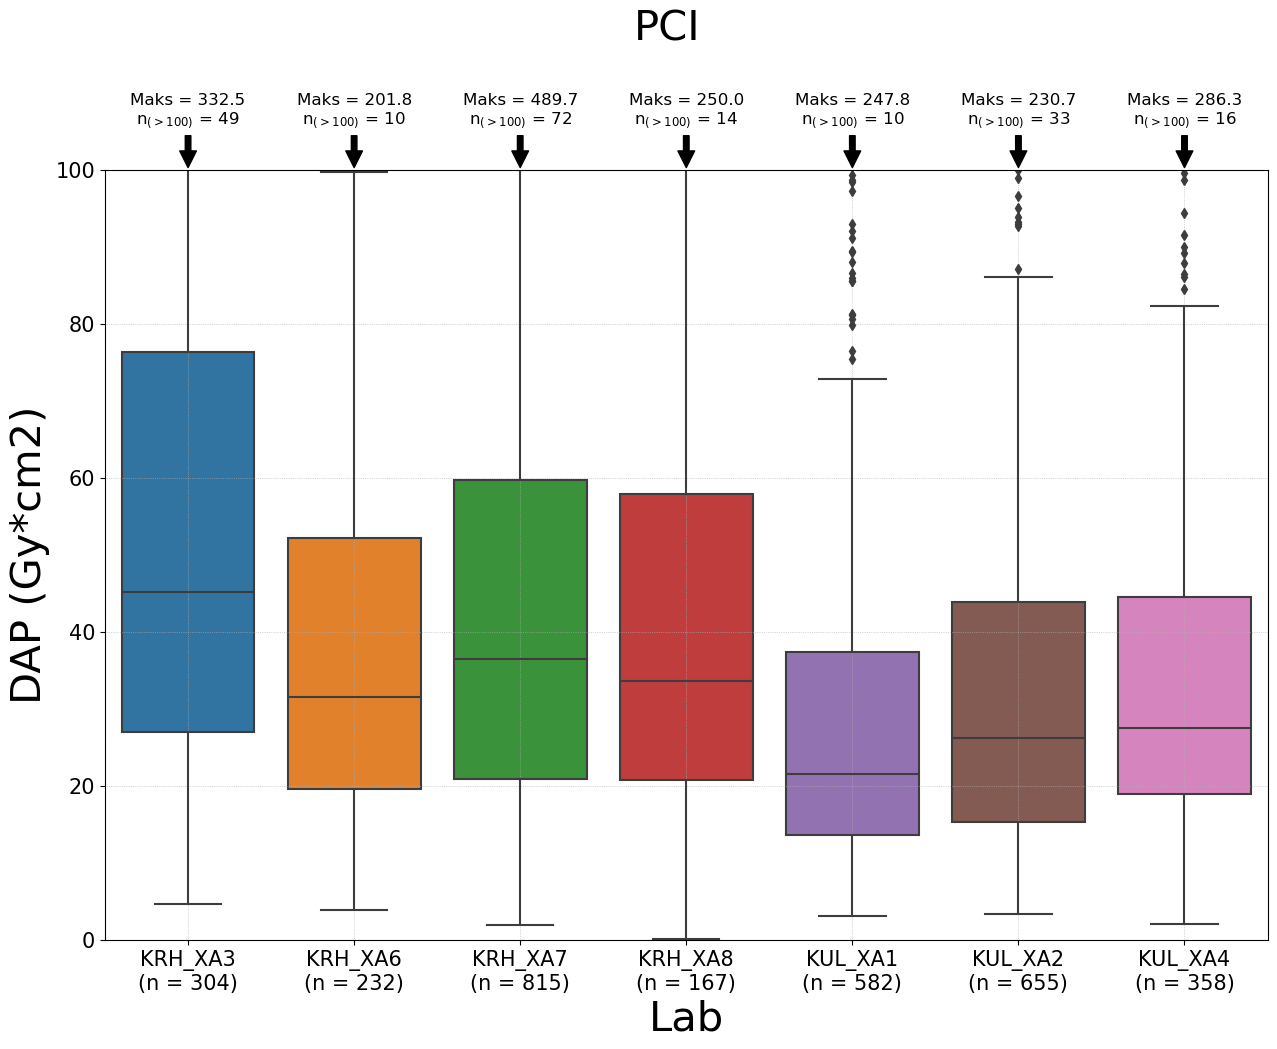

In [5]:
importlib.reload(bh_plot)
procedure = 'PCI'
export = False
bh_plot.plot_representative_dose(data, procedure, 100, export)

Reporting doses for Koronarangiografi:


Alle: n = 5069, DAP: Median - 10.5, IQR [6.1 - 18.5] (Gy*cm2), Range (0.0 - 235.7).


KRH_XA3: n =  777, DAP: Median - 13.66, IQR [7.71 - 22.98] (Gy*cm2), Range (1.21 - 165.99).
KRH_XA6: n =  569, DAP: Median - 12.65, IQR [7.39 - 20.71] (Gy*cm2), Range (0.27 - 193.89).
KRH_XA7: n = 1306, DAP: Median - 12.9, IQR [7.31 - 22.98] (Gy*cm2), Range (0.22 - 168.5).
KRH_XA8: n =  423, DAP: Median - 10.87, IQR [6.67 - 19.67] (Gy*cm2), Range (0.01 - 235.73).
KUL_XA1: n =  661, DAP: Median - 7.55, IQR [4.83 - 11.88] (Gy*cm2), Range (0.44 - 139.34).
KUL_XA2: n =  796, DAP: Median - 8.02, IQR [5.07 - 12.76] (Gy*cm2), Range (1.07 - 94.2).
KUL_XA4: n =  537, DAP: Median - 9.22, IQR [5.16 - 14.82] (Gy*cm2), Range (0.0 - 94.69).
--------------------------------------------------




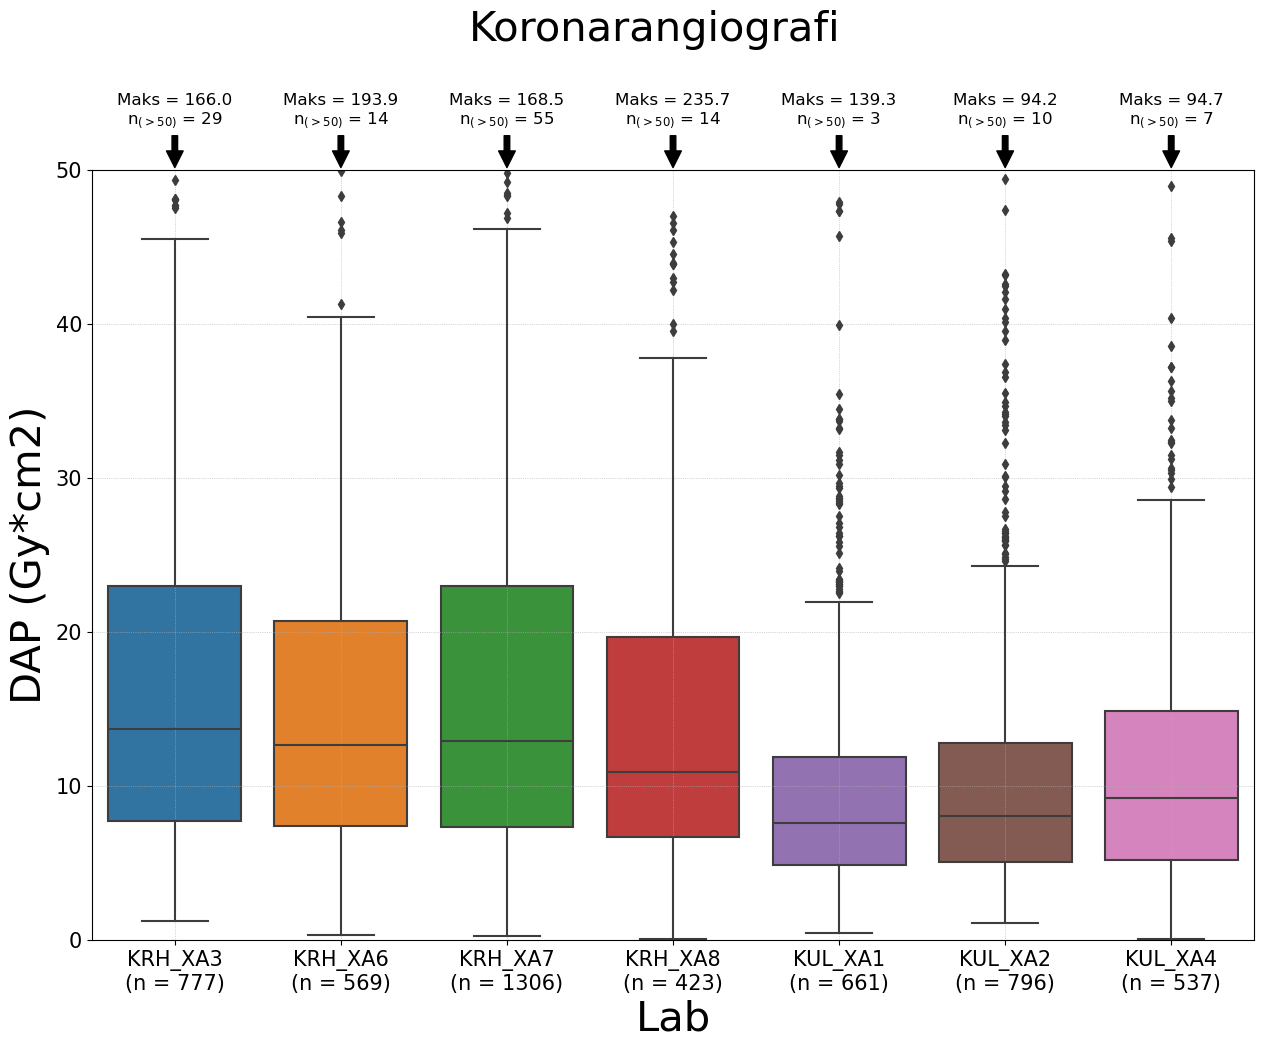

In [7]:
importlib.reload(bh_plot)
procedure = 'Koronarangiografi'
export = False
bh_plot.plot_representative_dose(data, procedure, 50, export)

Reporting doses for TAVI:


Alle: n =  654, DAP: Median - 21.7, IQR [13.1 - 37.7] (Gy*cm2), Range (0.9 - 416.6).


IRH_XA6: n =  427, DAP: Median - 19.32, IQR [11.57 - 34.97] (Gy*cm2), Range (0.87 - 285.51).
KRH_XA6: n =   18, DAP: Median - 21.22, IQR [9.96 - 34.32] (Gy*cm2), Range (6.47 - 416.62).
KUL_XA1: n =  209, DAP: Median - 27.28, IQR [17.7 - 44.34] (Gy*cm2), Range (5.7 - 256.17).
--------------------------------------------------




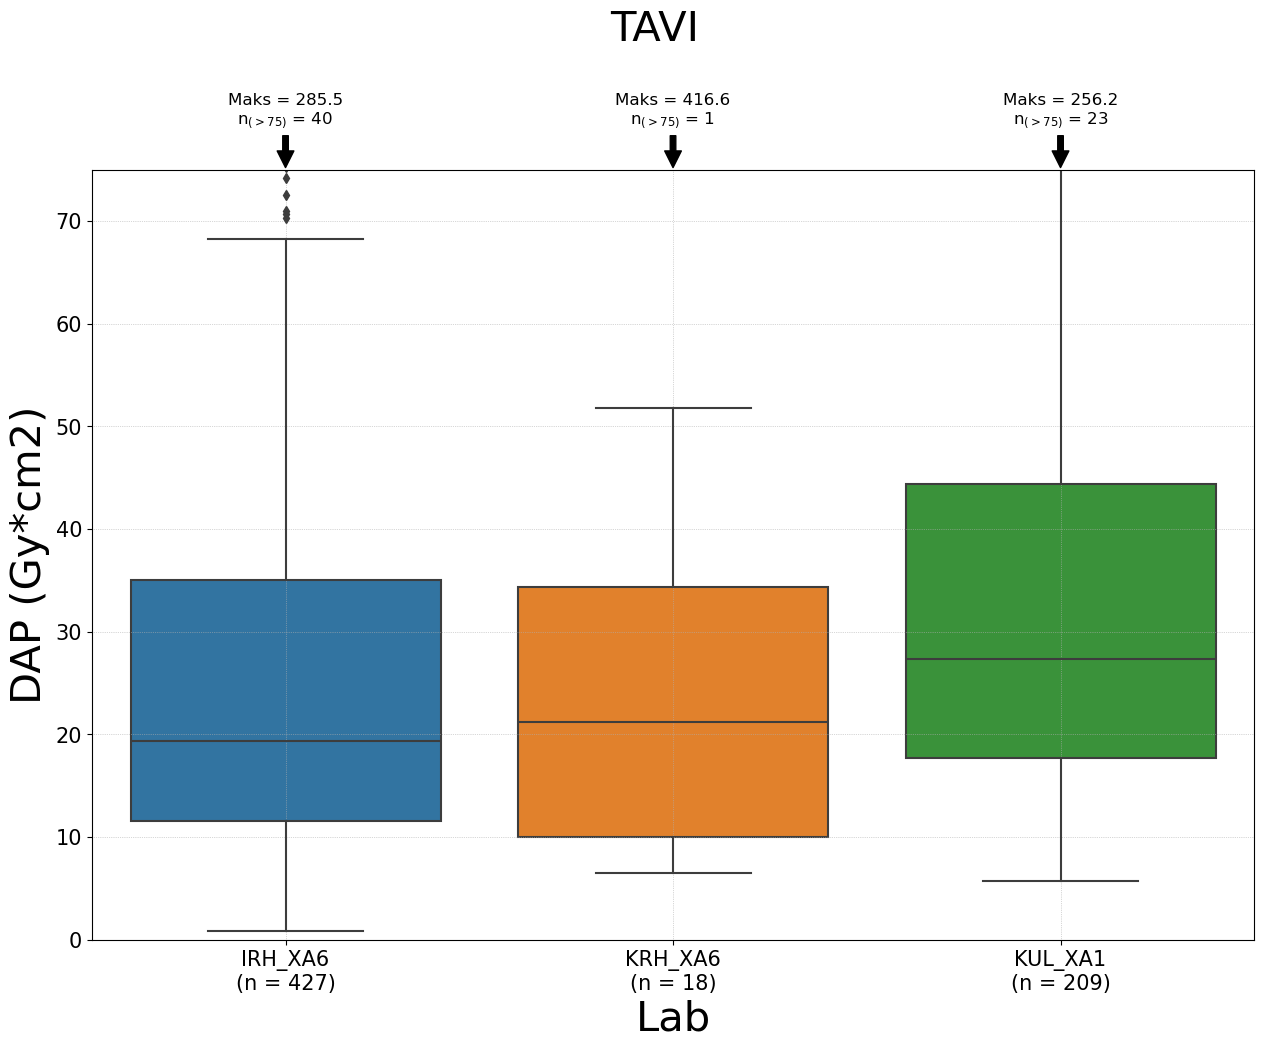

In [8]:
procedure = 'TAVI'
export = False
bh_plot.plot_representative_dose(data, procedure, 75, export)

Reporting doses for Mitraclip:


Alle: n =   25, DAP: Median - 28.8, IQR [19.6 - 49.5] (Gy*cm2), Range (5.2 - 118.0).


IRH_XA6: n =    9, DAP: Median - 51.02, IQR [37.02 - 58.14] (Gy*cm2), Range (19.64 - 117.95).
KRH_XA6: n =   16, DAP: Median - 24.02, IQR [14.44 - 31.29] (Gy*cm2), Range (5.15 - 83.95).
--------------------------------------------------




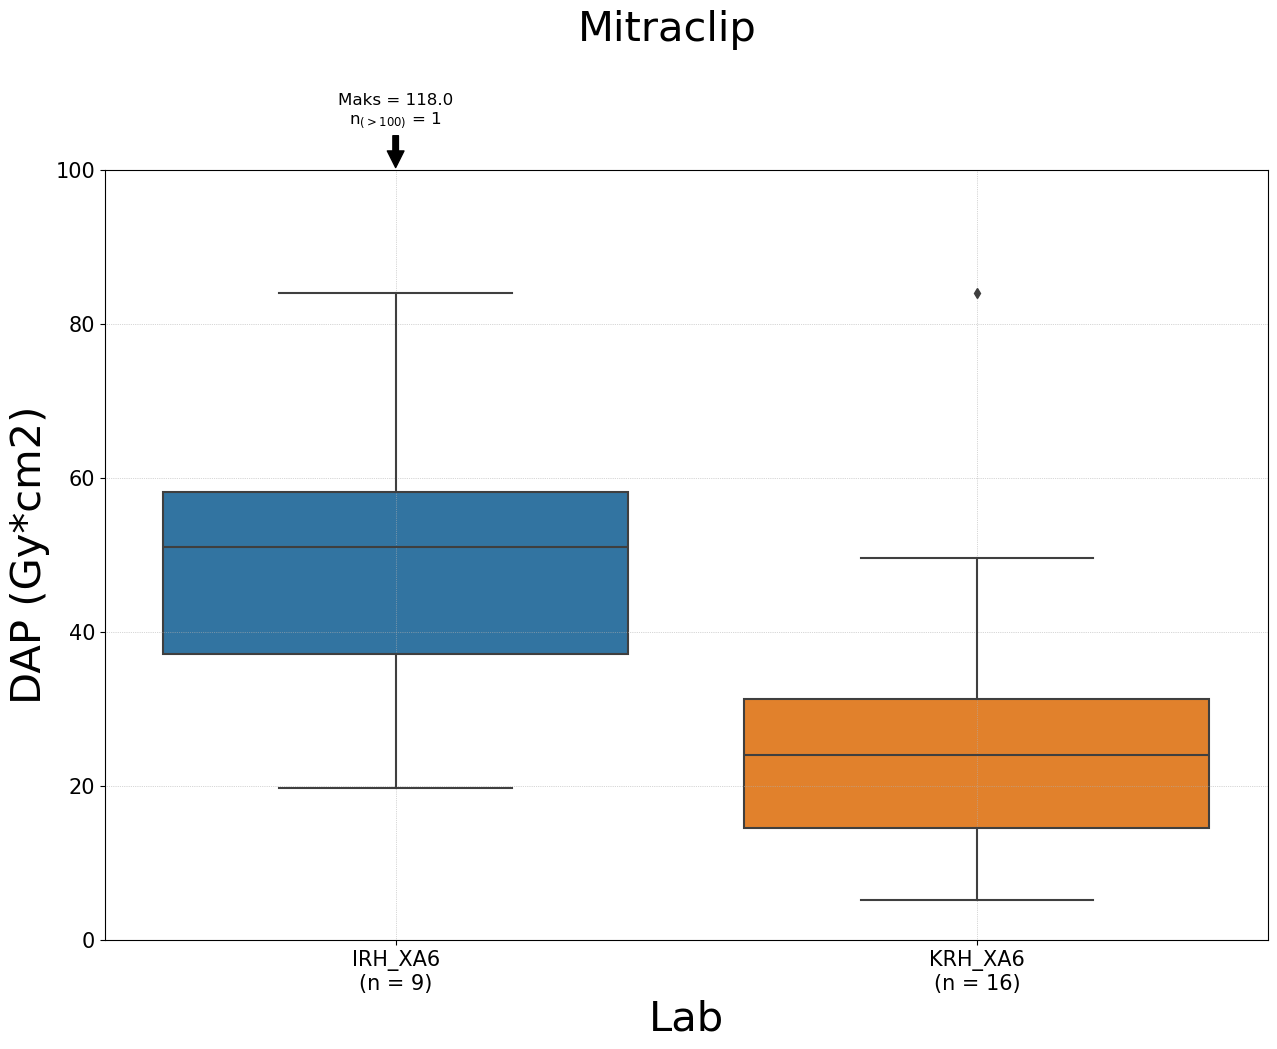

In [9]:
procedure = 'Mitraclip'
export = False
bh_plot.plot_representative_dose(data, procedure, 100, export)

Reporting doses for PTSMA:


Alle: n =   31, DAP: Median - 27.8, IQR [13.8 - 54.1] (Gy*cm2), Range (5.0 - 573.3).


KRH_XA3: n =   17, DAP: Median - 32.73, IQR [12.46 - 48.87] (Gy*cm2), Range (5.03 - 573.27).
KRH_XA6: n =    8, DAP: Median - 20.67, IQR [9.59 - 31.9] (Gy*cm2), Range (5.66 - 84.15).
KRH_XA7: n =    4, DAP: Median - 56.56, IQR [31.35 - 76.91] (Gy*cm2), Range (15.23 - 78.46).
KRH_XA8: n =    2, DAP: Median - 47.02, IQR [34.95 - 59.09] (Gy*cm2), Range (22.87 - 71.17).
--------------------------------------------------




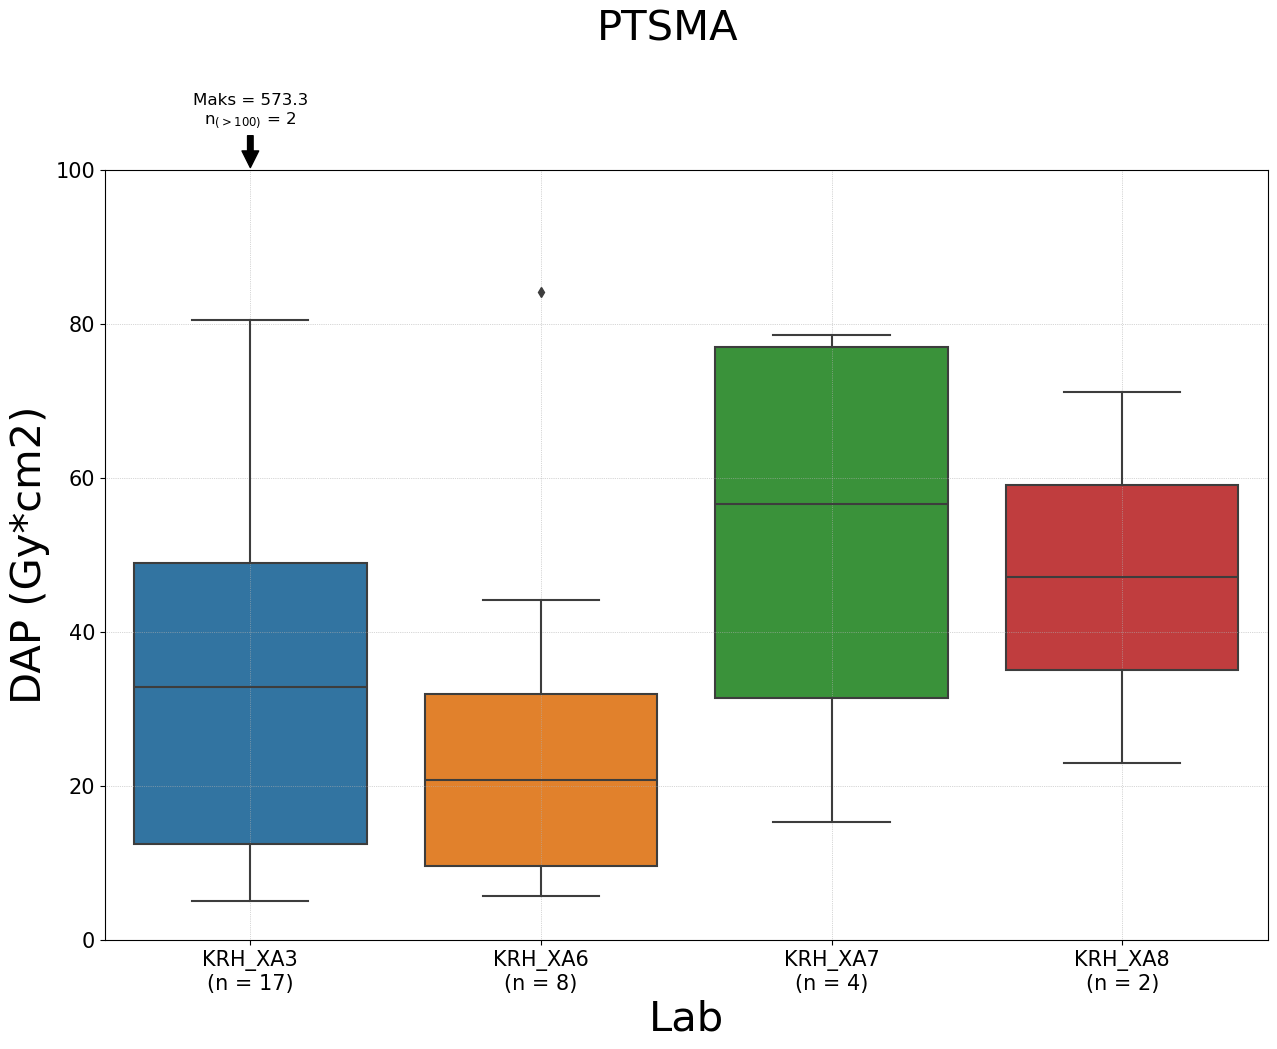

In [10]:
procedure = 'PTSMA'
export = False
bh_plot.plot_representative_dose(data, procedure, 100, export)

Reporting doses for PFO:


Alle: n =  145, DAP: Median - 2.5, IQR [1.5 - 4.7] (Gy*cm2), Range (0.3 - 54.7).


IRH_XA6: n =    4, DAP: Median - 2.14, IQR [1.67 - 6.72] (Gy*cm2), Range (1.48 - 19.27).
KRH_XA6: n =   95, DAP: Median - 2.84, IQR [1.29 - 5.18] (Gy*cm2), Range (0.35 - 54.7).
KUL_XA1: n =   46, DAP: Median - 2.37, IQR [1.66 - 3.52] (Gy*cm2), Range (0.68 - 10.52).
--------------------------------------------------




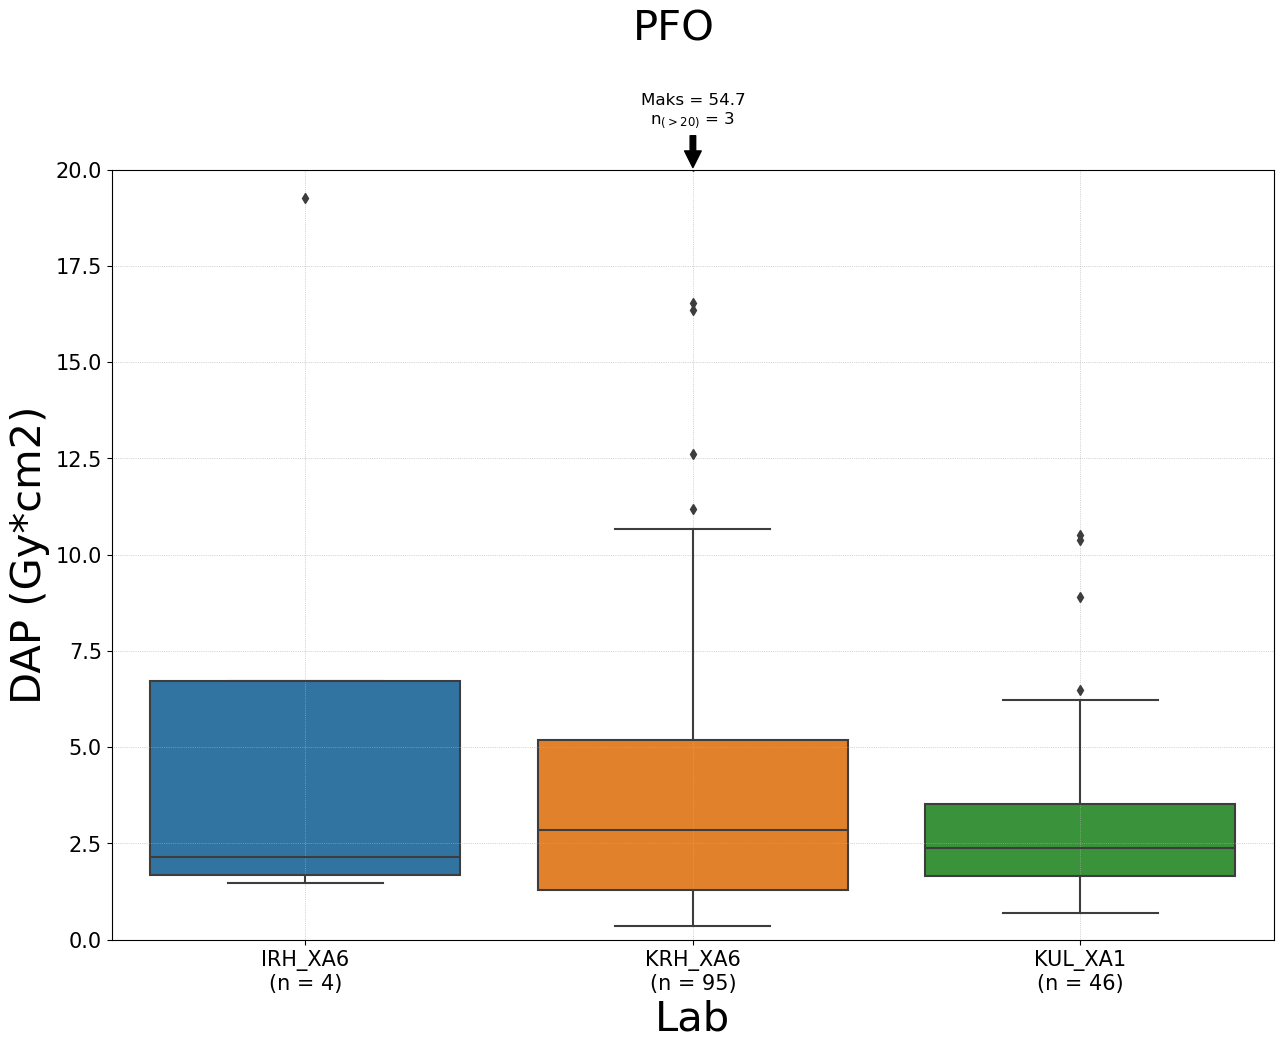

In [11]:
procedure = 'PFO'
export = False
bh_plot.plot_representative_dose(data, procedure, 20, export)